In [2]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-16 22:20:54--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [         <=>        ] 999.85K   504KB/s    in 2.0s    

2024-10-16 22:20:58 (504 KB/s) - ‘bank+marketing.zip’ saved [1023843]



In [3]:
!ls

 bank+marketing.zip   homework-02.ipynb   Untitled.ipynb
 homeword-01.ipynb    homework-03.ipynb  


In [4]:
!unzip bank+marketing.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [5]:
!ls

 bank+marketing.zip    homeword-01.ipynb   Untitled.ipynb
 bank-additional.zip   homework-02.ipynb  
 bank.zip              homework-03.ipynb  


In [6]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [8]:
!pip install matplotlib

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [64]:
!ls

 03_homework.ipynb     bank-names.txt      homework-02.ipynb
 bank+marketing.zip    bank.csv            homework-03.ipynb
 bank-additional.zip   bank.zip           
 bank-full.csv         homeword-01.ipynb  


In [65]:
df = pd.read_csv('bank-full.csv', sep=';')

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [67]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [68]:
df.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [69]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [70]:
features = ['age',
'balance',
'day',
'duration',
'campaign',
'pdays',
'previous',
'y']

In [71]:
features_no_target = ['age',
'balance',
'day',
'duration',
'campaign',
'pdays',
'previous']

In [72]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   day       45211 non-null  int64 
 3   duration  45211 non-null  int64 
 4   campaign  45211 non-null  int64 
 5   pdays     45211 non-null  int64 
 6   previous  45211 non-null  int64 
 7   y         45211 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.8+ MB


In [73]:
df[features].isna().any()

age         False
balance     False
day         False
duration    False
campaign    False
pdays       False
previous    False
y           False
dtype: bool

In [74]:
df[features].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [75]:
dff = df[features].copy()

In [77]:
df['education'].describe()

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

In [78]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
np.random.seed(42)

In [81]:
df_full_train, df_test = train_test_split(dff, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [82]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [83]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [84]:
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

del df_train['y']
del df_val['y']
del df_test['y']

In [86]:
cormax = dff.drop(columns='y').corr()
cormax

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [87]:
np.fill_diagonal(cormax.values, 0)
cormax

,age,balance,day,duration,campaign,pdays,previous
age,0.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,0.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,0.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,0.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,0.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,0.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,0.000000


In [88]:
cormax.max()

age         0.097783
balance     0.097783
day         0.162490
duration    0.021560
campaign    0.162490
pdays       0.454820
previous    0.454820
dtype: float64

In [89]:
cormax.unstack().sort_values(ascending=False)

pdays     previous    0.454820
previous  pdays       0.454820
day       campaign    0.162490
campaign  day         0.162490
age       balance     0.097783
balance   age         0.097783
          duration    0.021560
duration  balance     0.021560
balance   previous    0.016674
previous  balance     0.016674
campaign  age         0.004760
age       campaign    0.004760
balance   day         0.004503
day       balance     0.004503
pdays     balance     0.003435
balance   pdays       0.003435
age       previous    0.001288
previous  age         0.001288
duration  previous    0.001203
previous  duration    0.001203
          previous    0.000000
pdays     pdays       0.000000
balance   balance     0.000000
day       day         0.000000
age       age         0.000000
duration  duration    0.000000
campaign  campaign    0.000000
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

In [90]:
import seaborn as sn

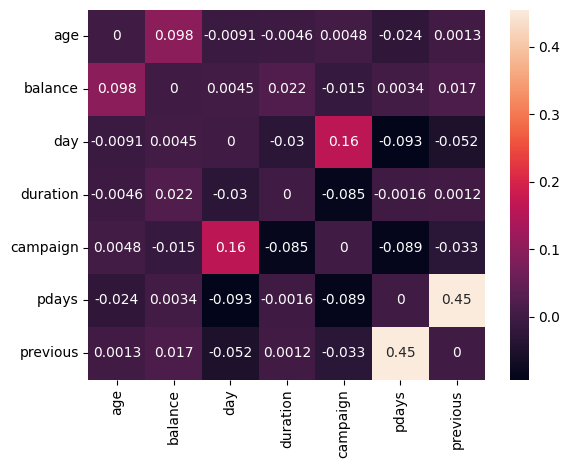

In [91]:
sn.heatmap(cormax, annot=True)
plt.show()

In [92]:
df_train.dtypes

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [93]:
from sklearn.metrics import mutual_info_score

In [128]:
for feat in ['contact', 'education', 'housing', 'poutcome']:
    print('{} : {}'.format(feat,mutual_info_score(df[feat], df.y)))



contact : 0.013626837798515465
education : 0.002598182762630869
housing : 0.009653977015338946
poutcome : 0.029397241496458754


In [129]:
from sklearn.feature_extraction import DictVectorizer

In [130]:
dv = DictVectorizer(sparse=False)

In [131]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

In [133]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'day', 'duration', 'pdays',
       'previous'], dtype=object)

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=1000)


In [136]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [137]:
from sklearn.metrics import accuracy_score

In [145]:
y_pred = model.predict_proba(X_train)[:,1]
predictions = (y_pred >= 0.5)

In [147]:
((y_train == 'yes') == predictions).mean()

np.float64(0.8909164639091647)

In [148]:
y_pred = model.predict_proba(X_val)[:,1]
predictions = (y_pred >= 0.5)

In [149]:
((y_val == 'yes') == predictions).mean()

np.float64(0.8843176288431763)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [158]:
y_train_lin = (y_train == 'yes')
y_train_lin = np.log1p(y_train_lin)
y_val_lin = (y_val == 'yes')
y_val_lin = np.log1p(y_val_lin)

In [159]:
model = Ridge()
model.fit(X_train, y_train_lin)

Ridge()

In [173]:
from sklearn.metrics import root_mean_squared_error

In [176]:
y_pred = model.predict(X_val)
y_pred = (y_pred == 'yes')
print(root_mean_squared_error(y_val_lin, y_pred))
print(root_mean_squared_error((y_val == 'yes'), np.expm1(y_pred)))

0.2416
0.3486


In [177]:
print(y_pred)
print(y_val_lin)
print(np.expm1(y_pred))
print((y_val == 'yes'))

[False False False ... False False False]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[False False False ... False False False]


In [181]:
alphas = [0, 0.01, 0.1, 1, 10, 100]

In [182]:
errors = []
errors_exp = []
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train_lin)
    y_preds = model.predict(X_val)
    errors.append((a, root_mean_squared_error(y_val_lin, y_preds).round(3)))
    errors_exp.append((a, root_mean_squared_error((y_val == 'yes'), np.expm1(y_preds)).round(3)))

In [183]:
print(errors)
print(errors_exp)

[(0, np.float64(0.209)), (0.01, np.float64(0.209)), (0.1, np.float64(0.209)), (1, np.float64(0.209)), (10, np.float64(0.209)), (100, np.float64(0.209))]
[(0, np.float64(0.318)), (0.01, np.float64(0.318)), (0.1, np.float64(0.318)), (1, np.float64(0.318)), (10, np.float64(0.318)), (100, np.float64(0.318))]
